In [1]:
%config InlineBackend.figure_formats = {"retina", "png"}
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append("..")

import tdgl
import superscreen as sc

In [2]:
import h5py

In [3]:
layer = tdgl.Layer(
    coherence_length=1, london_lambda=2, thickness=0.1, z0=0,
)


film = tdgl.Polygon("film", points=sc.geometry.box(10, points_per_side=151))
hole = tdgl.Polygon("hole", points=sc.geometry.circle(2))
source = tdgl.Polygon(points=tdgl.geometry.box(0.1, 10, center=(-5, 0)))
drain = source.scale(xfact=-1)

In [4]:
device = tdgl.Device(
    "box",
    layer=layer,
    film=film,
    holes=[hole],
    source_terminal=source,
    drain_terminal=drain,
    voltage_points=[(-4, 0), (4, 0)],
    length_units="um",
)

In [5]:
device.make_mesh(min_points=3000, optimesh_steps=100)

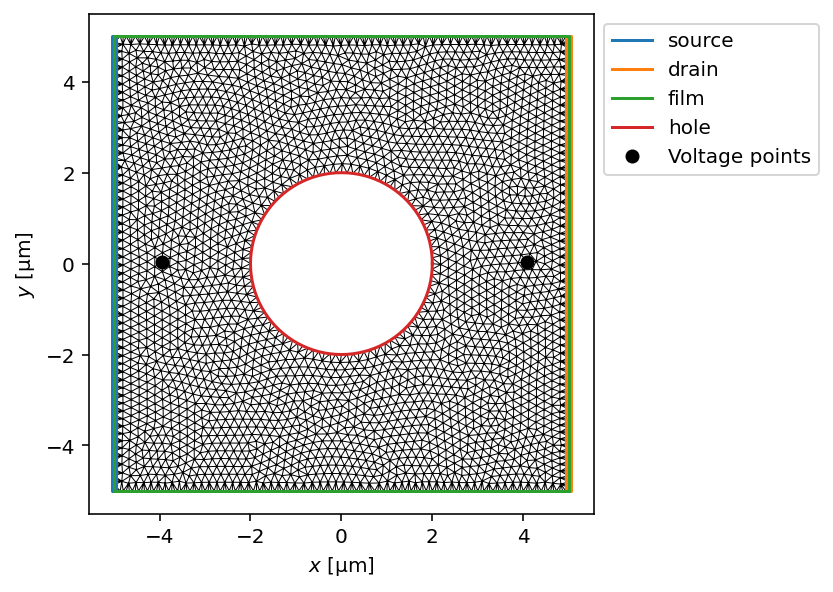

In [6]:
fig, ax = device.plot(mesh=True, mesh_kwargs=dict(color="k", lw=0.5, alpha=1))
# ax.plot(*device.points[device.mesh.voltage_points].T, "ko")

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='$x$ $[\\mathrm{µm}]$', ylabel='$y$ $[\\mathrm{µm}]$'>)

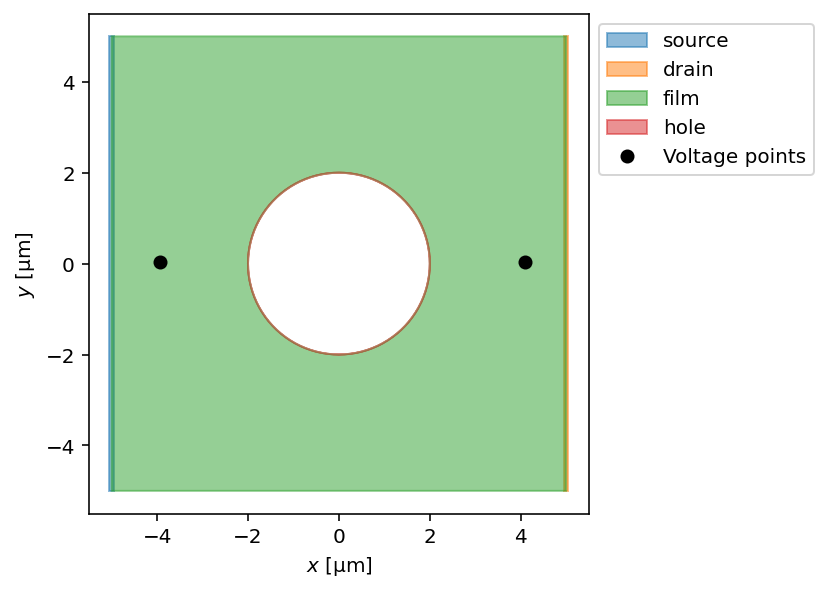

In [7]:
device.draw(legend=True)

In [8]:
# with h5py.File("mesh.h5", "w") as f:
#     device.mesh.save_to_hdf5(f)

In [9]:
device.to_hdf5("device.h5")

In [10]:
d = tdgl.Device.from_hdf5("device.h5")

In [11]:
d == device

True

In [12]:
device.layer == d.layer

True

In [13]:
d.layer

Layer(london_lambda=2.000, coherence_length=1.000, thickness=0.100, z0=0.000)

In [14]:
d.film

Polygon(name="film", points=<ndarray: shape=(604, 2)>, mesh=True)

In [15]:
d

Device(
    'box', 
    layer=Layer(london_lambda=2.000, coherence_length=1.000, thickness=0.100, z0=0.000), 
    film=Polygon(name="film", points=<ndarray: shape=(604, 2)>, mesh=True), 
    holes=[Polygon(name="hole", points=<ndarray: shape=(101, 2)>, mesh=True)], 
    abstract_regions=[], 
    source_terminal=Polygon(name="source", points=<ndarray: shape=(100, 2)>, mesh=False), 
    drain_terminal=Polygon(name="drain", points=<ndarray: shape=(100, 2)>, mesh=False), 
    voltage_points=array([[-4,  0],
       [ 4,  0]]), 
    length_units='um', 
    solve_dtype=dtype('float64'),
)